# Showing the time Symmetry of the 2 point functions

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from functions import jk_2pt_energy as jk

In [2]:
base_dir_p="kaon_P"

#### The following function is to read the 2 point function data from the files
Here each row represents the data of 2 point functions with time from a file. So different rows basically represents the values of the same 2 point function at that time stamp from different files and each file is basically just another instance.

In [3]:
def read_files(base_dir,momentum):
    #Time averaging over the data 
    def time_avg(l):
        n=int(len(l)/2)
        l[1:n]=(l[1:n]+l[-1:-n:-1])/2
        return l[:n+1]
    
    #px^2 + py^2
    def resultant_momentum(px,py):
        return (px**2+py**2)
    
    #reading data of different momentum configuration
    def load_file(file,momentum):
        data=np.loadtxt(file)
        t_final=int(len(data)/64)

        count=0
        d=[]
        for t in range(t_final):
            
            if(resultant_momentum(data[(t*64),0],data[(t*64),1])==momentum):
                d.append(data[t*64:(t+1)*64,4])
                count+=1
                
            elif (resultant_momentum(data[(t*64),0],data[(t*64),1])>momentum):
                break

        result=np.mean(d,axis=0)    
        return result
 
    # Function to average the two files together
    def avg_files(file1, file2,momentum):

        # Read the data from the files
        data1 = load_file(file1,momentum)
        data2 = load_file(file2,momentum)

        result= data1+data2
        return result

    # List to store results from each pair of files
    results = []

    # Loop through the subdirectories
    for folder in sorted(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder)
        
        # Ensure that the path is a directory
        if os.path.isdir(folder_path):
            # Find all .dat files in the directory
            dat_files = sorted(glob.glob(os.path.join(folder_path, '*.dat')))
            
            # Check if there are exactly 2 .dat files
            if len(dat_files) == 2:
                file1, file2 = dat_files
                data=avg_files(file1, file2,momentum)
                #result = time_avg(data/2)
                result = (data/2)
                results.append(result)
                
            elif len(dat_files) == 1:
                #print(f"Folder {folder} does not contain exactly 2 .dat files.")
                
                data=load_file(dat_files[0],momentum)
                #result=time_avg(data)
                result=(data)

                results.append(result)
            else:
                pass
            
    return np.array(results)

### Initially has taken the x and y component of the momentum as 0

In [4]:
momentum=0 #Resultant of x and y component of momenttum

### For momentum 0 (0 GeV) along the z axis

In [5]:
pz=0
base_dir_p0 = base_dir_p+str(pz)
raw_data_p0=read_files(base_dir_p0,momentum)

In [6]:
(Energy_p0,Energy_error_p0, E_bins_p0)=jk(raw_data_p0)

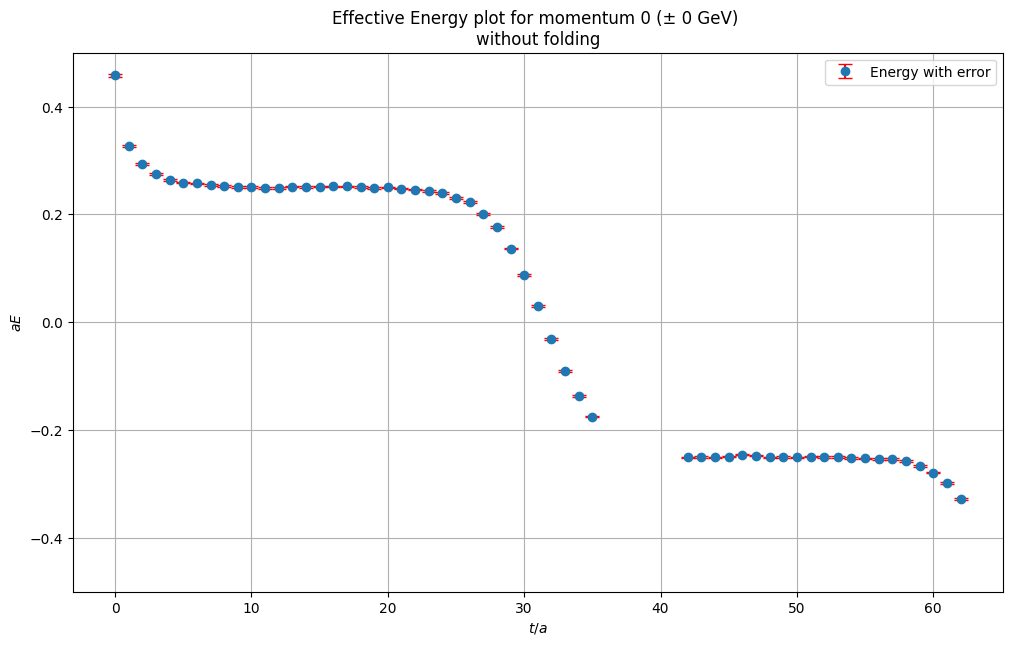

In [7]:
plt.figure(figsize=(12, 7))
plt.title("Effective Energy plot for momentum 0 (\u00B1 0 GeV) \nwithout folding")
plt.errorbar(np.arange(len(Energy_p0)),Energy_p0,yerr=Energy_error_p0,fmt='o',ecolor='r', capsize=5, label="Energy with error")
plt.legend(loc="upper right")
plt.grid()
plt.ylim(-0.5,0.5)
plt.xlabel("$t/a$")
plt.ylabel("$aE$")
plt.show()

### For momentum 1 ($\pm$ 0.41 GeV) along the z axis

In [20]:
pz=1
base_dir_p1 = base_dir_p+str(pz)
raw_data_p1=read_files(base_dir_p1,momentum)

In [22]:
(Energy_p1,Energy_error_p1, E_bins_p1)=jk(raw_data_p1)

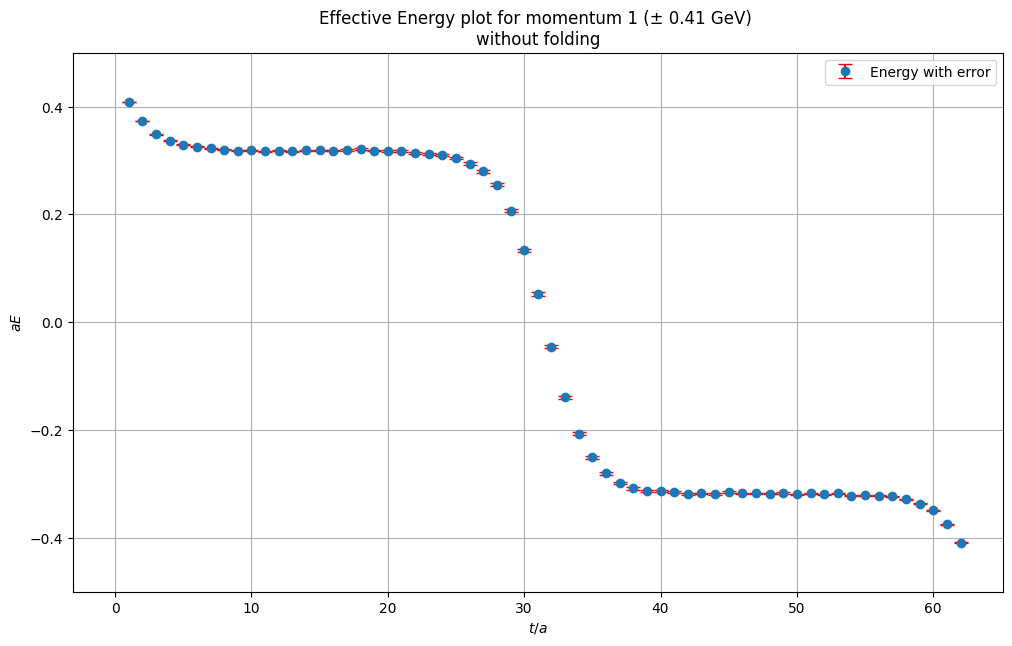

In [23]:
plt.figure(figsize=(12, 7))
plt.title("Effective Energy plot for momentum 1 (\u00B1 0.41 GeV) \nwithout folding")
plt.errorbar(np.arange(len(Energy_p1)),Energy_p1,yerr=Energy_error_p1,fmt='o',ecolor='r', capsize=5, label="Energy with error")
plt.legend(loc="upper right")
plt.grid()
plt.ylim(-0.5,0.5)
plt.xlabel("$t/a$")
plt.ylabel("$aE$")
plt.show()

### For momentum 2 ($\pm$ 0.83 GeV) along the z axis

In [45]:
pz=2

In [46]:
base_dir_p2 = base_dir_p+str(pz)
raw_data_p2=read_files(base_dir_p2,momentum)

In [50]:
(Energy_p2,Energy_error_p2, E_bins_p2)=jk(raw_data_p2)

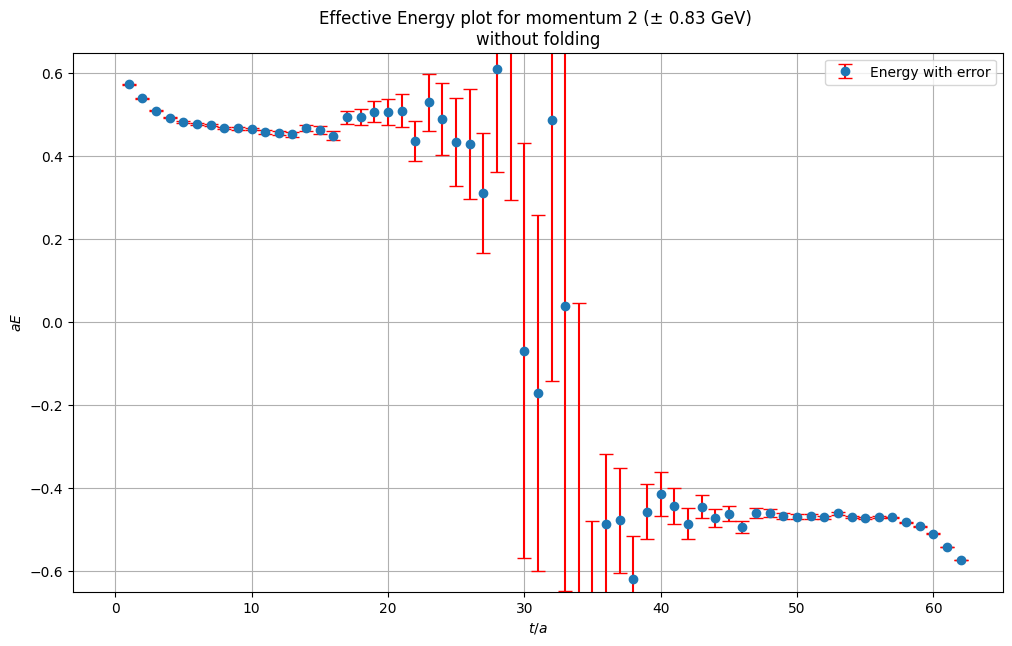

In [52]:
plt.figure(figsize=(12, 7))
plt.title("Effective Energy plot for momentum 2 (\u00B1 0.83 GeV) \nwithout folding")
#plt.plot(np.arange(len(Energy_p2)),Energy_p2,'o',label="Energy with error")
plt.errorbar(np.arange(len(Energy_p2)),Energy_p2,yerr=Energy_error_p2,fmt='o',ecolor='r', capsize=5, label="Energy with error")
plt.legend(loc="upper right")
plt.grid()
plt.ylim(-0.65,0.65)
plt.xlabel("$t/a$")
plt.ylabel("$aE$")
plt.show()

### Using this symmetry we do the time averaging for the values of 2pt function at the $i$ th time step and $(64−i)$ th time step for all $i\in [1,31]$.
#### $$2pt(t) = \frac{[2pt(t) + 2pt(64-t)]}{2}$$

#### So now time runs from 0 to 32 only, where 0 and 32 are not being altered. Where as before time averaging it ran form 0 to 63.